# Question: What run times solicit the most ratings on IMDb?
We would like to know what run times yield the most imdb ratings. Here we think of the number of IMDb votes as proxy for popularity. 

## Loading Data
Below we import our database and print the column names for the `ratings` and `runtimes` tables. We will join these tables to form our data set. 

In [64]:
from moviesdb import moviesdb as mdb
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
db = mdb.MoviesDb()

In [13]:
print('=== runtimes ===')
for column in db.list_column_names('runtimes'):
    print(column)

print('')
print('=== ratings ===')
for column in db.list_column_names('ratings'):
    print(column)

=== runtimes ===
tconst
runtime_minutes

=== ratings ===
tconst
averagerating
numvotes


We can join the `runtimes` and `ratings` tables on the `tconst` variable. this will produce a dataset with all films for which we have both rating and runtime data. 

In [76]:
query = """
SELECT ru.runtime_minutes, sum(ra.numvotes) AS num_votes
FROM runtimes as ru
INNER JOIN ratings AS ra
USING('tconst')
GROUP BY ru.runtime_minutes
"""
df = db.load_query_as_df(query)

# Question specific data cleaning
There are a few films with extremely long run times, we focus our analysis on films with run times shorter than four hours. We also    

In [77]:
df = df.query('runtime_minutes <= 240')

TypeError: unsupported operand type(s) for +: 'AxesSubplot' and 'AxesSubplot'

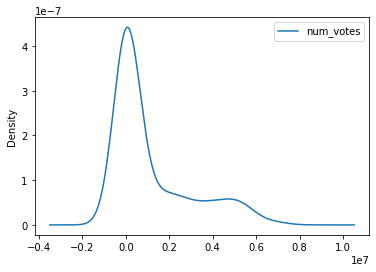

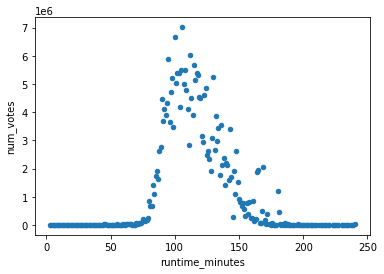

In [84]:
df.plot.kde(x='runtime_minutes', y='num_votes')
df.plot.scatter(x='runtime_minutes', y='num_votes')

<AxesSubplot:ylabel='Frequency'>

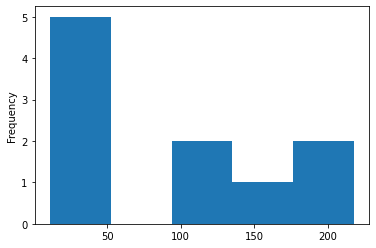

In [73]:
df['num_votes'][:10].plot.hist(bins=5)

In [29]:
votes_by_runtime = pd.DataFrame()
votes_by_runtime['numvotes'] = title_basics_ratings_df['numvotes']
votes_by_runtime['binned_runtime'] = title_basics_ratings_df['runtime_minutes'].apply( lambda x: int(np.ceil(x/20)*20))
votes_by_runtime = votes_by_runtime.groupby('binned_runtime').agg('median').reset_index()

<AxesSubplot:xlabel='binned_runtime', ylabel='numvotes'>

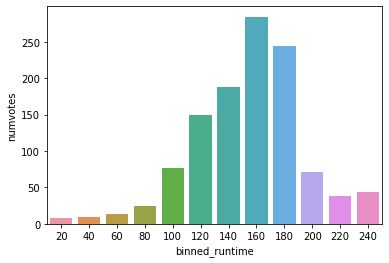

In [30]:
sns.barplot(x='binned_runtime' , y='numvotes' , data=votes_by_runtime)